In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Librerías para arboles de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Librería para PCA
from sklearn.decomposition import PCA
# Libreria para KMeans
from sklearn.cluster import KMeans
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Librería para RandomForest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Librerías para métricas
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report,recall_score, f1_score
import scipy 
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [2]:
# Función para calcular métricas
def CalculaMetricas(variable):
    
    # Elimino los vacíos
    variable = variable[variable.isnull() == False]

    media = variable.mean()
    mediana = variable.median()
    media_recortada = scipy.stats.trim_mean(variable,0.1)
    varianza = variable.var()
    desvio = variable.std()
    primer_cuartil = variable.quantile(0.25)
    tercer_cuartil = variable.quantile(0.75)
    percentil_1 = variable.quantile(0.01)
    percentil_99 = variable.quantile(0.99)
    error_estandar = scipy.stats.sem(variable) 
    cv = scipy.stats.variation(variable)
    asimetria = scipy.stats.skew(variable) 
    curtosis = scipy.stats.kurtosis(variable)    
    
    resultado = (
        f'Medidas de Tendencia Central\n'
        f'Media: {round(media, 0)}\n'
        f'Media Recortada: {round(media_recortada, 0)}\n'
        f'Mediana: {round(mediana, 0)}\n\n'
        f'Medidas de Localización\n'
        f'Primer Cuartil: {round(primer_cuartil, 0)}\n'
        f'Tercer Cuartil: {round(tercer_cuartil, 0)}\n'
        f'Percentil 1: {round(percentil_1, 0)}\n'
        f'Percentil 99: {round(percentil_99, 0)}\n\n'
        f'Medidas de Dispersión Absolutas\n'
        f'Varianza: {round(varianza, 0)}\n'
        f'Desvío Estándar: {round(desvio, 0)}\n'
        f'Rango Intercuartílico: {round(tercer_cuartil - primer_cuartil, 0)}\n'
        f'Error Estándar: {round(error_estandar, 0)}\n\n'
        f'Medidas de Dispersión Relativas\n'
        f'Coeficiente de Variación: {round(cv, 2)}\n'
        f'Desvío Intercuartílico: {round((tercer_cuartil - primer_cuartil) / (tercer_cuartil + primer_cuartil), 2)}\n\n'
        f'Medidas de Asimetría y Curtosis\n'
        f'Coeficiente de Asimetría: {round(asimetria, 2)}\n'
        f'Coeficiente de Curtosis: {round(curtosis, 2)}'
    )

    print(resultado)

In [3]:
# Cargo Datasets y Verificamos su consistencia:

url = 'https://raw.githubusercontent.com/yoriohe/PR0Y3CT0_C0D3RH0US3/main/WA_Fn-UseC_-Telco-Customer-Churn-Base.csv'

df1=  pd.read_csv(url,sep=",")
df1.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



ATRIBUTOS:

customerID: Customer ID

gender : Si el cliente es hombre o mujer.

SeniorCitizen : Si el cliente es persona mayor o no (1, 0)

Partner: Si el cliente tiene pareja o no (Sí, No)

Dependents: Si el cliente tiene dependientes o no (Sí, No)

Tenure : (Tenencia) Número de meses que el cliente ha permanecido en la empresa.

PhoneService :Si el cliente tiene servicio telefónico o no (Sí, No)

MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, No hay servicio telefónico)

InternetService : Proveedor de servicios de internet del cliente (DSL, Fibra óptica, No)

OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, No servicio de internet)

OnlineBackup: Si el cliente tiene respaldo en línea o no (Sí, No, No hay servicio de Internet)

DeviceProtection: Si el cliente tiene protección del dispositivo o no (Sí, No, Sin servicio de Internet)

TechSupport: Si el cliente tiene soporte técnico o no (Sí, No, No servicio de internet)

StreamingTV: Si el cliente tiene streaming de TV o no (Sí, No, No servicio de internet)

StreamingMovies: Si el cliente tiene streaming de películas o no (Sí, No, No servicio de internet)

Contract: El plazo del contrato del cliente (mes a mes, un año, dos años)

PaperlessBilling: Si el cliente dispone de facturación electrónica o no (Sí, No)

PaymentMethod: El método de pago del cliente (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática), tarjeta de crédito (automática))

MonthlyCharges:El importe cobrado a la cliente mensualmente.

TotalCharges: El importe total cargado a la cliente.

Churn: Si la cliente Canceló su suscripción o no (Sí o No)

In [4]:
# Analizamos características del dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Convierto la columna de TotalCharges de Tipo Object a float
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [6]:
#Chequeo que no haya ningún duplicado en la columna de "customerID"
boolean = df1.duplicated(subset=['customerID']).any()
print(boolean, end='\n\n')

False



In [7]:
#Me fijo las categorias dentro de cada columna para ver si hay algún error.
for columna in df1:
  print(columna, df1[columna].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [8]:
# Función para calcular métricas
def CalculaMetricas(variable):
    
    # Elimino los vacíos
    variable = variable[variable.isnull() == False]

    media = variable.mean()
    mediana = variable.median()
    media_recortada = scipy.stats.trim_mean(variable,0.1)
    varianza = variable.var()
    desvio = variable.std()
    primer_cuartil = variable.quantile(0.25)
    tercer_cuartil = variable.quantile(0.75)
    percentil_1 = variable.quantile(0.01)
    percentil_99 = variable.quantile(0.99)
    error_estandar = scipy.stats.sem(variable) 
    cv = scipy.stats.variation(variable)
    asimetria = scipy.stats.skew(variable) 
    curtosis = scipy.stats.kurtosis(variable)    
    
    resultado = (
        f'Medidas de Tendencia Central\n'
        f'Media: {round(media, 0)}\n'
        f'Media Recortada: {round(media_recortada, 0)}\n'
        f'Mediana: {round(mediana, 0)}\n\n'
        f'Medidas de Localización\n'
        f'Primer Cuartil: {round(primer_cuartil, 0)}\n'
        f'Tercer Cuartil: {round(tercer_cuartil, 0)}\n'
        f'Percentil 1: {round(percentil_1, 0)}\n'
        f'Percentil 99: {round(percentil_99, 0)}\n\n'
        f'Medidas de Dispersión Absolutas\n'
        f'Varianza: {round(varianza, 0)}\n'
        f'Desvío Estándar: {round(desvio, 0)}\n'
        f'Rango Intercuartílico: {round(tercer_cuartil - primer_cuartil, 0)}\n'
        f'Error Estándar: {round(error_estandar, 0)}\n\n'
        f'Medidas de Dispersión Relativas\n'
        f'Coeficiente de Variación: {round(cv, 2)}\n'
        f'Desvío Intercuartílico: {round((tercer_cuartil - primer_cuartil) / (tercer_cuartil + primer_cuartil), 2)}\n\n'
        f'Medidas de Asimetría y Curtosis\n'
        f'Coeficiente de Asimetría: {round(asimetria, 2)}\n'
        f'Coeficiente de Curtosis: {round(curtosis, 2)}'
    )

    print(resultado)

In [9]:
nulos = df1.isnull().sum()
nulos = nulos[nulos > 0]

# Crear un nuevo DataFrame con los valores de nulos y su respectiva columna
df_nulos = pd.DataFrame({'Columna': nulos.index, 'Cantidad de nulos': nulos.values})

# Imprimir el DataFrame de manera más bonita
print("Cantidad de nulos:")
print(df_nulos)

Cantidad de nulos:
        Columna  Cantidad de nulos
0  TotalCharges                 11


In [10]:
#Desccartamos la columna Customer ID y  Antigüedad_Categoria
columns_to_drop = ['customerID']
df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [11]:
# Verificamos las características de las columnas numéricas
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
#Buscamos aquellos features que no son numéricos si no se encuentran en la función describe.
text_data_features = [i for i in list(df1.columns) if i not in list(df1.describe().columns)]
text_data_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [13]:
# Crear un nuevo DataFrame con las características categóricas binarizadas
df_encoded = pd.get_dummies(df1, columns=text_data_features, drop_first=True)

#drop_first=True #elimina la primera categoría de cada característica para evitar la multicolinealidad

# Mostrar las primeras filas del nuevo DataFrame
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [14]:
# Llenar valores no finitos con 0
df_encoded_filled = df_encoded.fillna(0)

# Convertir los valores booleanos en el DataFrame df_encoded_filled a 0 y 1
df_encoded_filled = df_encoded_filled.astype(int)

# Verificar los primeros elementos del DataFrame después de la conversión
df_encoded_filled.head()



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29,29,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56,1889,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53,108,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42,1840,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70,151,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [15]:
df_encoded_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   SeniorCitizen                          7043 non-null   int32
 1   tenure                                 7043 non-null   int32
 2   MonthlyCharges                         7043 non-null   int32
 3   TotalCharges                           7043 non-null   int32
 4   gender_Male                            7043 non-null   int32
 5   Partner_Yes                            7043 non-null   int32
 6   Dependents_Yes                         7043 non-null   int32
 7   PhoneService_Yes                       7043 non-null   int32
 8   MultipleLines_No phone service         7043 non-null   int32
 9   MultipleLines_Yes                      7043 non-null   int32
 10  InternetService_Fiber optic            7043 non-null   int32
 11  InternetService_No            

Text(0.5, 1.0, 'Distribución por Antiguedad')

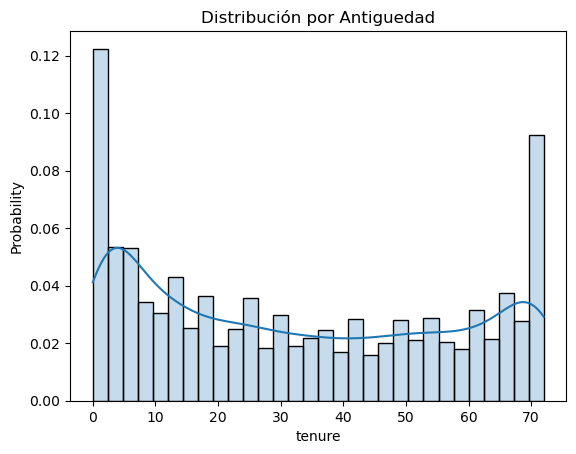

In [16]:
# Distribución de variable Edad
plt.figure()
# Histograma
sns.histplot(data = df_encoded_filled,
             x = 'tenure',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
plt.title('Distribución por Antiguedad')

In [17]:
# Métricas de la variable tenure
CalculaMetricas(df_encoded_filled['tenure'])

Medidas de Tendencia Central
Media: 32.0
Media Recortada: 31.0
Mediana: 29.0

Medidas de Localización
Primer Cuartil: 9.0
Tercer Cuartil: 55.0
Percentil 1: 1.0
Percentil 99: 72.0

Medidas de Dispersión Absolutas
Varianza: 603.0
Desvío Estándar: 25.0
Rango Intercuartílico: 46.0
Error Estándar: 0.0

Medidas de Dispersión Relativas
Coeficiente de Variación: 0.76
Desvío Intercuartílico: 0.72

Medidas de Asimetría y Curtosis
Coeficiente de Asimetría: 0.24
Coeficiente de Curtosis: -1.39


In [18]:
df_encoded_filled.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [19]:
# df_encoded_filled es el DataFrame

# Contar la cantidad de valores NaN por fila
nan_counts = df_encoded_filled.isna().sum(axis=1)

# Contar cuántas filas tienen al menos un NaN
rows_with_nan = (nan_counts > 0).sum()

# Eliminar las filas que contienen al menos un NaN
df_cleaned = df_encoded_filled.dropna()

# Imprimir la forma del DataFrame antes y después de eliminar las filas con NaN
print("Forma del DataFrame antes de eliminar filas con NaN:", df_encoded.shape)
print("Forma del DataFrame después de eliminar filas con NaN:", df_cleaned.shape)


Forma del DataFrame antes de eliminar filas con NaN: (7043, 31)
Forma del DataFrame después de eliminar filas con NaN: (7043, 31)


In [20]:
# Por cualquier cosa no tomo  si quedan registrso nulos
df_analizar = df_cleaned.loc[df_cleaned['Churn_Yes'].isnull() == False]

In [21]:
features=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Genero matriz de features y array de target
X = df_analizar[features].values
y = df_analizar['Churn_Yes'].values



In [22]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Crear una instancia del modelo de Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X, y)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear una lista de tuplas que contengan el nombre de la característica y su importancia
feature_importance_list = list(zip(features, feature_importances))

# Ordenar la lista de características por importancia (de mayor a menor)
feature_importance_list_sorted = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Imprimir las características más importantes
#print("Características más importantes:")
#for feature, importance in feature_importance_list_sorted:
#    print(f"{feature}: {importance}")

# Seleccionar las características más importantes (por ejemplo, las 10 principales)
top_features = [feature for feature, _ in feature_importance_list_sorted[:10]]
print("\nLas 10 características más importantes:")
print(top_features)



Las 10 características más importantes:
['TotalCharges', 'tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'Contract_Two year', 'gender_Male', 'PaperlessBilling_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes']


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo de Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X, y)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear una lista de tuplas que contengan el nombre de la característica y su importancia
feature_importance_list = list(zip(features, feature_importances))

# Ordenar la lista de características por importancia (de mayor a menor)
feature_importance_list_sorted = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Seleccionar las características más importantes (por ejemplo, las 10 principales)
top_features = [feature for feature, _ in feature_importance_list_sorted[:10]]

# Calcular la suma total de las importancias de las características seleccionadas
total_importance = sum(importance for _, importance in feature_importance_list_sorted[:10])

# Calcular el peso relativo de cada elemento
relative_weights = {feature: importance / total_importance for feature, importance in feature_importance_list_sorted[:10]}

# Crear una tabla con los pesos relativos de cada elemento
import pandas as pd

# Convertir el diccionario de pesos relativos a un DataFrame de Pandas
df_relative_weights = pd.DataFrame(relative_weights.items(), columns=['Elemento', 'Peso Relativo'])

# Mostrar la tabla
print("\nPeso relativo de cada elemento:")
print(df_relative_weights)



Peso relativo de cada elemento:
                         Elemento  Peso Relativo
0                    TotalCharges       0.261962
1                          tenure       0.252339
2                  MonthlyCharges       0.184470
3     InternetService_Fiber optic       0.054640
4  PaymentMethod_Electronic check       0.050565
5               Contract_Two year       0.044334
6                     gender_Male       0.041967
7            PaperlessBilling_Yes       0.037850
8              OnlineSecurity_Yes       0.037007
9                 TechSupport_Yes       0.034866


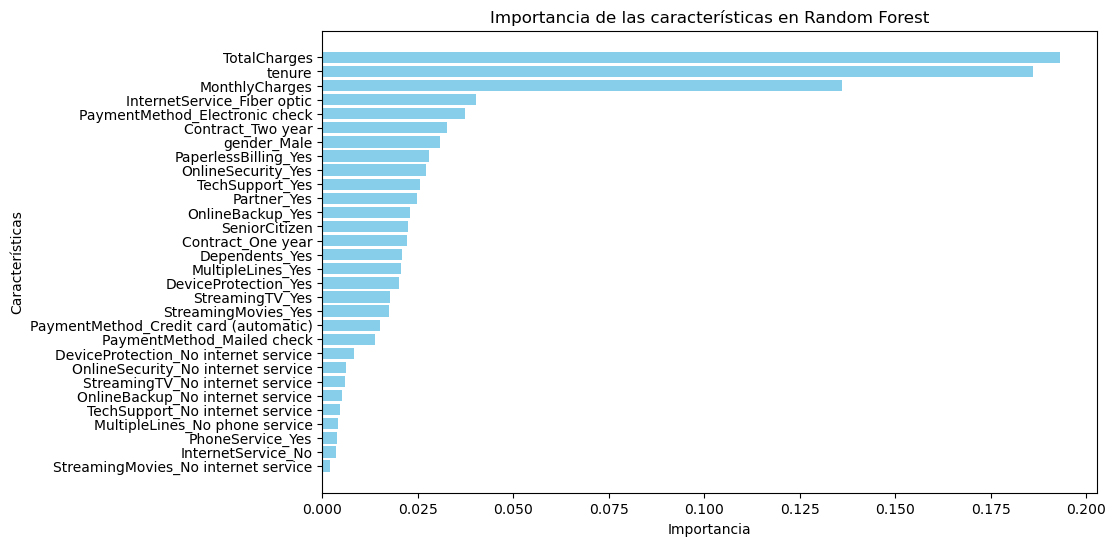

In [24]:
import matplotlib.pyplot as plt

# Obtener los nombres de las características y sus importancias
features_names = [feature[0] for feature in feature_importance_list_sorted]
importances = [feature[1] for feature in feature_importance_list_sorted]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(features_names, importances, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las características en Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para que las características más importantes estén arriba
plt.show()


Text(0.5, 1.0, 'Relación entre Tenure y Churn')

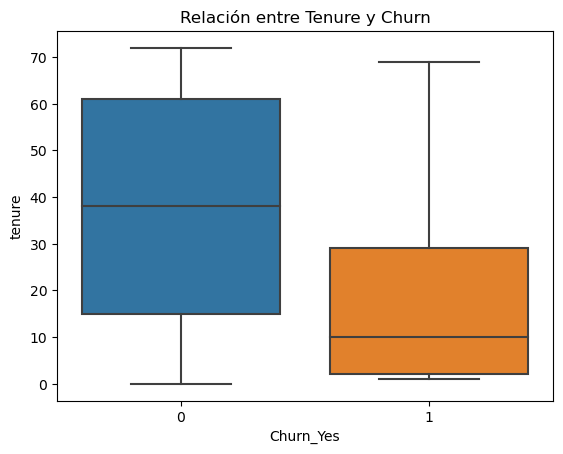

In [25]:
# Analizo relaciones
# PClass
plt.figure()
sns.boxplot(data = df_analizar,
            x = 'Churn_Yes',
            y = 'tenure', 
            showfliers = False)
plt.title('Relación entre Tenure y Churn')


Text(0.5, 1.0, 'Relación entre Monto de Cargos Total y Churn')

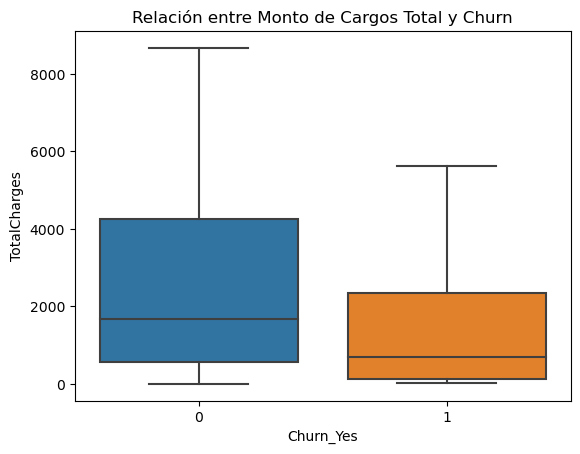

In [26]:
# Analizo relaciones
# PClass
plt.figure()
sns.boxplot(data = df_analizar,
            x = 'Churn_Yes',
            y = 'TotalCharges', 
            showfliers = False)
plt.title('Relación entre Monto de Cargos Total y Churn')

In [27]:
 df_analizar.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [28]:
df_analizar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   SeniorCitizen                          7043 non-null   int32
 1   tenure                                 7043 non-null   int32
 2   MonthlyCharges                         7043 non-null   int32
 3   TotalCharges                           7043 non-null   int32
 4   gender_Male                            7043 non-null   int32
 5   Partner_Yes                            7043 non-null   int32
 6   Dependents_Yes                         7043 non-null   int32
 7   PhoneService_Yes                       7043 non-null   int32
 8   MultipleLines_No phone service         7043 non-null   int32
 9   MultipleLines_Yes                      7043 non-null   int32
 10  InternetService_Fiber optic            7043 non-null   int32
 11  InternetService_No                 

## SEPARO TRAIN Y TEST

In [29]:
#Separamos en train y test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_analizar,
                                    test_size = 0.2, #Porcentaje de muestra test 
                                    random_state = 15) #Semilla
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [30]:
# Normalizamos los datos SIN EL TARGET.. SOLO FEATURES
from sklearn.preprocessing import StandardScaler
X_train = df_train[features].values
X_test = df_test[features].values
# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X_train = sc.fit_transform(X_train)
# Le aplico el escalador a test
X_test = sc.transform(X_test)

## PCA

In [31]:
# Aplicacion de PCA
from sklearn.decomposition import PCA
# Inicio el objeto PCA
pca = PCA(11)
# Genero componentes con TRAIN
PCA_train = pca.fit_transform(X_train)
# Aplico a test
PCA_test = pca.transform(X_test)

# Almaceno en dataframe y presento
# Train
PCA_train = pd.DataFrame(data=PCA_train)
prefijo = "PC_"
PCA_train = PCA_train.add_prefix(prefijo)
# Test
PCA_test = pd.DataFrame(data=PCA_test)
prefijo = "PC_"
PCA_test = PCA_test.add_prefix(prefijo)
# ¿Qué generé?
PCA_train.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,5.846245,0.387662,-0.310279,0.359615,-1.485256,-0.155851,-1.409206,0.902228,-0.405961,0.795995,-1.218059
1,-2.371326,2.801984,-0.409922,-0.712172,1.887308,1.085610,1.778028,1.172679,-0.101523,0.274160,0.799319
2,-2.201861,2.811052,0.869506,-0.560163,-1.725788,-0.111943,0.584694,-1.020840,-0.885130,-0.480706,1.895462
3,6.164865,0.006590,0.043345,-1.206600,1.670237,1.113771,-0.945270,0.936567,-0.266118,0.182352,0.342355
4,-1.057439,-2.900805,-1.338366,0.232749,-0.095244,-0.465346,-0.005827,0.781682,-1.425420,-0.412460,-0.301792


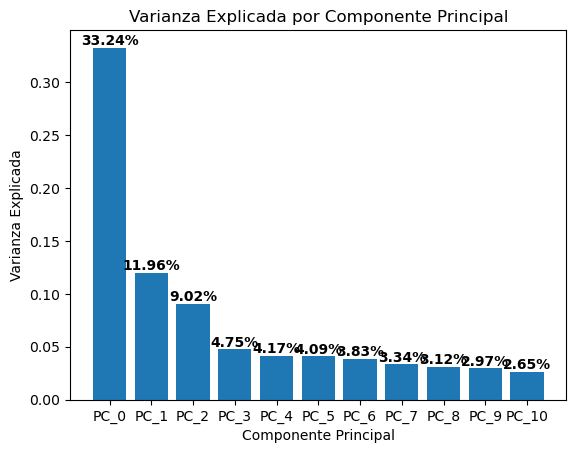

In [32]:
# Análisis de la varianza explicada para cada componente
varianza_explicada = pca.explained_variance_ratio_
componentes = PCA_train.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(y_text * 100,2))}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

Insights

En este análisis de componentes principales (PCA), exploramos la estructura de nuestros datos y redujimos la dimensionalidad del conjunto de variables originales a través de componentes principales. La varianza explicada por cada componente principal nos revela cuánto de la variabilidad original de los datos es capturada por cada componente. Observando la "Varianza Acumulada," notamos que los primeros pocos componentes ya explican una proporción significativa de la varianza total. Por ejemplo, al retener los primeros 10 componentes, logramos cubrir aproximadamente el 83,43% de la variabilidad, indicando que estos componentes capturan patrones clave en nuestros datos. Esta reducción de dimensionalidad podría ser valiosa para simplificar nuestro modelo y facilitar interpretaciones, especialmente si estamos dispuestos a aceptar alguna pérdida de información.

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   index                                  5634 non-null   int64
 1   SeniorCitizen                          5634 non-null   int32
 2   tenure                                 5634 non-null   int32
 3   MonthlyCharges                         5634 non-null   int32
 4   TotalCharges                           5634 non-null   int32
 5   gender_Male                            5634 non-null   int32
 6   Partner_Yes                            5634 non-null   int32
 7   Dependents_Yes                         5634 non-null   int32
 8   PhoneService_Yes                       5634 non-null   int32
 9   MultipleLines_No phone service         5634 non-null   int32
 10  MultipleLines_Yes                      5634 non-null   int32
 11  InternetService_Fiber optic   

In [34]:
# NORMALIZAMOS EL TARGET SIN ESCALADOR (EN FORMA MANUAL COMO ENSEÑO XIME ...)
y_train = df_train['Churn_Yes']
y_test = df_test['Churn_Yes']
# Calculo media y desvio
media = y_train.mean()
desvio = np.std(y_train, ddof = 0)
# Genero parámetros con train
df_train['Churn_Yes_Scaled'] = (df_train['Churn_Yes'] - media) / desvio
df_test['Churn_Yes_Scaled'] = (df_test['Churn_Yes'] - media) / desvio

In [35]:
df_train.head()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Churn_Yes_Scaled
0,5464,0,25,20,499,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,-0.597715
1,1604,0,69,95,6511,1,1,1,1,0,...,0,0,1,0,0,1,0,0,0,-0.597715
2,3297,0,42,84,3571,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,-0.597715
3,3703,0,9,20,190,1,0,1,1,0,...,1,0,1,0,0,0,0,1,0,-0.597715
4,3030,0,1,79,79,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1.673038


In [36]:
# Features escaladas
df_train_scaled = pd.DataFrame(data = X_train)
prefijo = "Scaled_"
df_train_scaled.columns = features
df_train_scaled.add_prefix(prefijo)
df_train_scaled = df_train_scaled.add_prefix(prefijo)
df_test_scaled = pd.DataFrame(data = X_test)
prefijo = "Scaled_"
df_test_scaled.columns = features
df_test_scaled = df_test_scaled.add_prefix(prefijo)


In [37]:
df_train_scaled,df_test_scaled

(      Scaled_SeniorCitizen  Scaled_tenure  Scaled_MonthlyCharges  \
 0                -0.442060      -0.295366              -1.468500   
 1                -0.442060       1.504759               1.024999   
 2                -0.442060       0.400137               0.659286   
 3                -0.442060      -0.949957              -1.468500   
 4                -0.442060      -1.277253               0.493053   
 ...                    ...            ...                    ...   
 5629             -0.442060       0.359225              -1.302267   
 5630             -0.442060       1.422935               1.556946   
 5631             -0.442060       1.545671              -1.468500   
 5632             -0.442060       1.627495              -1.501747   
 5633              2.262137       0.441049               1.224479   
 
       Scaled_TotalCharges  Scaled_gender_Male  Scaled_Partner_Yes  \
 0               -0.782586            0.990109           -0.964081   
 1                1.887466    

In [38]:
# Uno todo a los dataframes originales
df_train = pd.concat([df_train,df_train_scaled,PCA_train],axis = 1)
df_test = pd.concat([df_test,df_test_scaled,PCA_test],axis = 1)

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         5634 non-null   int64  
 1   SeniorCitizen                                 5634 non-null   int32  
 2   tenure                                        5634 non-null   int32  
 3   MonthlyCharges                                5634 non-null   int32  
 4   TotalCharges                                  5634 non-null   int32  
 5   gender_Male                                   5634 non-null   int32  
 6   Partner_Yes                                   5634 non-null   int32  
 7   Dependents_Yes                                5634 non-null   int32  
 8   PhoneService_Yes                              5634 non-null   int32  
 9   MultipleLines_No phone service                5634 non-null   i

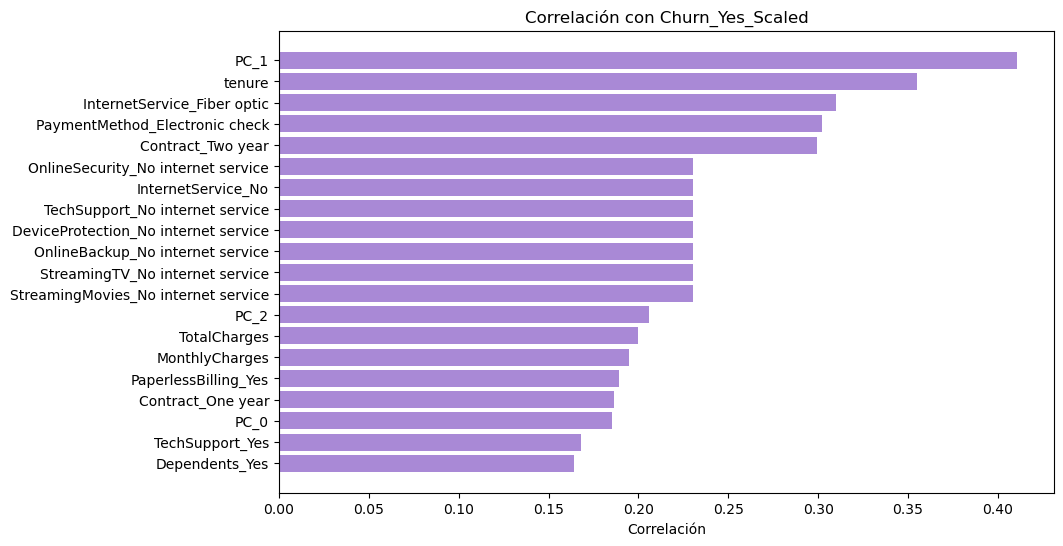

In [40]:
# Correlación con el target 
variables_PCA = ['PC_0','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7','PC_8','PC_9','PC_10','Churn_Yes_Scaled']
variables_final = features + variables_PCA
# Calculo matriz de correlación 
matriz_correlacion = df_train[variables_final].corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['Churn_Yes_Scaled']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['Churn_Yes_Scaled']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Churn_Yes_Scaled')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

In [41]:
# Extraer las 20 características más correlacionadas
features = matriz_correlacion_target_graficar.index.tolist()

# Imprimir la lista en el formato deseado
print("features =", features)


features = ['PC_1', 'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check', 'Contract_Two year', 'OnlineSecurity_No internet service', 'InternetService_No', 'TechSupport_No internet service', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'PC_2', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling_Yes', 'Contract_One year', 'PC_0', 'TechSupport_Yes', 'Dependents_Yes']


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         1409 non-null   int64  
 1   SeniorCitizen                                 1409 non-null   int32  
 2   tenure                                        1409 non-null   int32  
 3   MonthlyCharges                                1409 non-null   int32  
 4   TotalCharges                                  1409 non-null   int32  
 5   gender_Male                                   1409 non-null   int32  
 6   Partner_Yes                                   1409 non-null   int32  
 7   Dependents_Yes                                1409 non-null   int32  
 8   PhoneService_Yes                              1409 non-null   int32  
 9   MultipleLines_No phone service                1409 non-null   i

In [43]:
# Dividimos aleatoriamente los datos en conjuntos de entrenamiento y prueba para modelos de aprendizaje automático.
cantidad_registros = df1.shape[0]
semilla = 15
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
df1['TRAIN'] = np.where(serie_random < 0.3, 0, 1)

In [44]:
print(f"La cantidad de datos para entrenamiento son {df1['TRAIN'].sum()} y para test son {df1.shape[0] - df1['TRAIN'].sum()}")

La cantidad de datos para entrenamiento son 4937 y para test son 2106


In [45]:
from sklearn.linear_model import LogisticRegression

# Selecciono features y genero inputs del modelo
features = ['PC_1', 'tenure', 'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
            'Contract_Two year', 'OnlineSecurity_No internet service', 'InternetService_No', 
            'TechSupport_No internet service', 'DeviceProtection_No internet service', 
            'OnlineBackup_No internet service', 'StreamingTV_No internet service', 
            'StreamingMovies_No internet service', 'PC_2', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling_Yes', 
            'Contract_One year', 'PC_0', 'TechSupport_Yes', 'Dependents_Yes']
X_train = df_train[features].values
y_train = df_train['Churn_Yes'].values
X_test = df_test[features].values
y_test = df_test['Churn_Yes'].values

# Genero y entreno
reg_log_1 = LogisticRegression(max_iter=1000)
reg_log_1.fit(X_train, y_train)

# Predicciones
y_pred_train = reg_log_1.predict(X_train)
y_pred_test = reg_log_1.predict(X_test)
y_pred_prob_train = reg_log_1.predict_proba(X_train)[:,1]
y_pred_prob_test = reg_log_1.predict_proba(X_test)[:,1]




Text(0.5, 1.0, 'Distribución Estimaciones TEST')

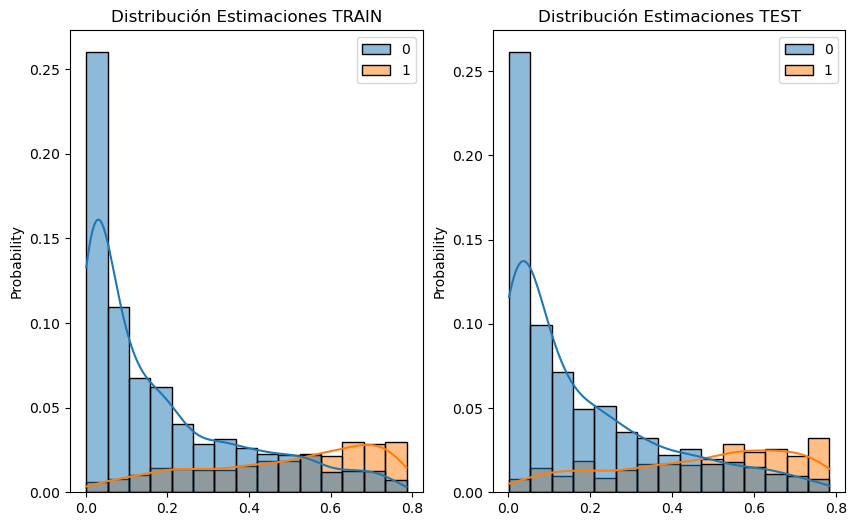

In [46]:
# Histogramas de predicción 
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.histplot(x = y_pred_prob_train,  
             alpha = 0.5,
             hue = y_train,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones TRAIN')
plt.subplot(122)
sns.histplot(x = y_pred_prob_test,  
             alpha = 0.5,
             hue = y_test,
             stat = 'probability', 
             bins = 15,
            kde = True)
plt.title('Distribución Estimaciones TEST')


In [47]:
# Poder de ordenamiento
# Agrego predicción en mi dataframes
df_train['Predict_Prob_RegLog'] = y_pred_prob_train
df_test['Predict_Prob_RegLog'] = y_pred_prob_test

# Defino cortes
bin_edges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
bin_labels = range(1, 6)

# Corto
df_train['Predict_RegLog_Bin'] = pd.cut(df_train['Predict_Prob_RegLog'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)
df_test['Predict_RegLog_Bin'] = pd.cut(df_test['Predict_Prob_RegLog'], 
                                  bins=bin_edges, 
                                  labels=bin_labels, 
                                  include_lowest=True)

# Genero agrupaciones
resultados_nodo_TRAIN = df_train.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),              
    Cant_Churn = ('Churn_Yes', 'sum'),            
    Tasa_Churn = ('Churn_Yes', 'mean')    
).reset_index()

resultados_nodo_TEST = df_test.groupby('Predict_RegLog_Bin').agg(     
    Cant = ('Predict_RegLog_Bin', 'count'),              
    Cant_Churn = ('Churn_Yes', 'sum'),            
    Tasa_Churn = ('Churn_Yes', 'mean')    
).reset_index()


In [48]:
resultados_nodo_TRAIN

,Predict_RegLog_Bin,Cant,Cant_Churn,Tasa_Churn
0,1,2954,203,0.068720
1,2,1013,300,0.296150
2,3,890,421,0.473034
3,4,777,559,0.719434
4,5,0,0,NaN


In [49]:
resultados_nodo_TEST

,Predict_RegLog_Bin,Cant,Cant_Churn,Tasa_Churn
0,1,736,70,0.095109
1,2,269,68,0.252788
2,3,221,119,0.538462
3,4,183,129,0.704918
4,5,0,0,NaN


Text(0.5, 1.0, 'Poder de Ordenamiento - TEST')

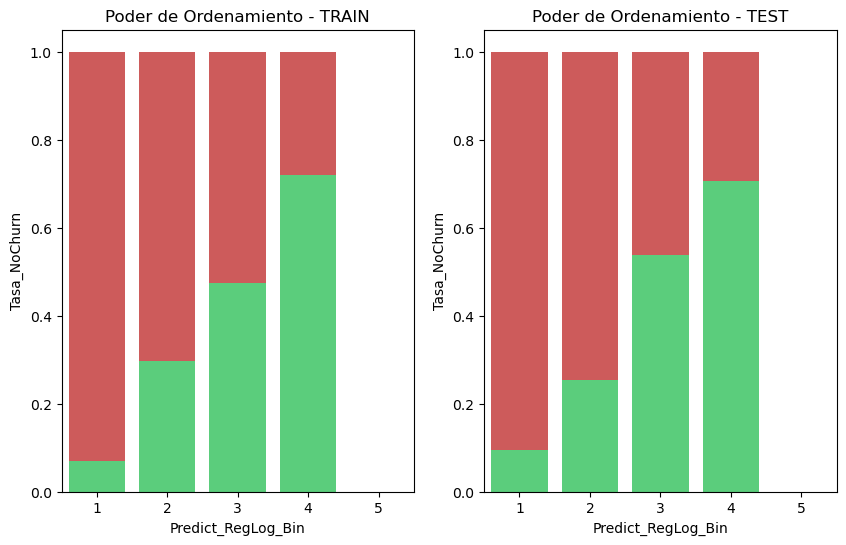

In [50]:
# Barplot por nodo 
resultados_nodo_TRAIN['Tasa_NoChurn'] = (1 - resultados_nodo_TRAIN['Tasa_Churn'])
resultados_nodo_TEST['Tasa_NoChurn'] = (1 - resultados_nodo_TEST['Tasa_Churn'])
plt.figure(figsize=(10,6)) 
plt.subplot(121)
sns.barplot(data = resultados_nodo_TRAIN,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_Churn', 
            label = 'Porcentaje Renuncia',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TRAIN, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_NoChurn', 
            bottom=resultados_nodo_TRAIN['Tasa_Churn'], 
            label = 'Porcentaje No Renuncia',
            color = '#E04848')
plt.title('Poder de Ordenamiento - TRAIN')
plt.subplot(122)
sns.barplot(data = resultados_nodo_TEST,
            x = 'Predict_RegLog_Bin',
            y = 'Tasa_Churn', 
            label = 'Porcentaje Renuncia',
            color = '#48E074')
sns.barplot(data=resultados_nodo_TEST, 
            x = 'Predict_RegLog_Bin', 
            y = 'Tasa_NoChurn', 
            bottom=resultados_nodo_TEST['Tasa_Churn'], 
            label = 'Porcentaje No Renuncia',
            color = '#E04848')
plt.title('Poder de Ordenamiento - TEST')

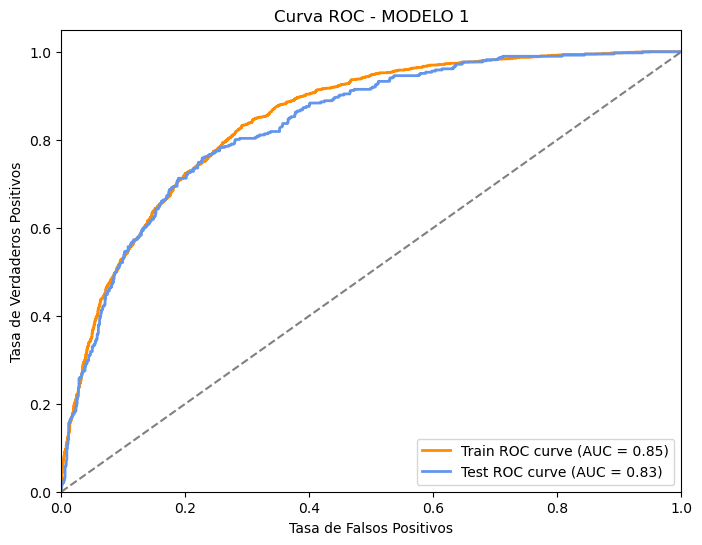

In [51]:
# ROC Y AUC
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba
y_train = y_train
y_train_proba = y_pred_prob_train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = y_test
y_test_proba = y_pred_prob_test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 1')
plt.legend(loc='lower right')
plt.show()

In [52]:
# Metricas
print('TRAIN')
accuracy = round(accuracy_score(y_train, y_pred_train),3)
conf_matrix = confusion_matrix(y_train, y_pred_train)
recall = round(recall_score(y_train, y_pred_train),3)
f1 = round(f1_score(y_train, y_pred_train),3)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('-----------------------------------------------')
print('-----------------------------------------------')
print('TEST')
accuracy = round(accuracy_score(y_test, y_pred_test),3)
conf_matrix = confusion_matrix(y_test, y_pred_test)
recall = round(recall_score(y_test, y_pred_test),3)
f1 = round(f1_score(y_test, y_pred_test),3)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

TRAIN
Accuracy: 0.802
Recall: 0.536
F1 Score: 0.588
Confusion Matrix:
[[3725  426]
 [ 688  795]]
-----------------------------------------------
-----------------------------------------------
TEST
Accuracy: 0.799
Confusion Matrix:
[[928  95]
 [188 198]]
Recall: 0.513
F1 Score: 0.583
